<h1 align='center'><strong>HEATMAP GENERATION</strong></h1>

__Breast cancer__ is a clinical situation that has been reappearing over the years, as we are seeing more and more awareness campaigns for early __detection__ and support for affected patients. Detection in _late stages_ is __common__, either because of lack of interest in self-examination or because of the difficulty of detection, so we decided to look for other ways of detection, in this case by __molecular methods.__

We chose the collection of _protein expression_ analysis data, called __"proteomes"__, because it is one of the most relevant ways to detect abnormalities, as long as the disease is _well characterized_. The selected dataset consists of a collection of approximately __77 proteomes__, with __77 different patients__, with the expression of __~12,000 proteins__, all completely different and related to molecular processes of cancer progression.

_The present report has been created for the generation of HeatMaps using as data the 'Breast Cancer Proteomes' dataset from piotrgrabo, which contains about 77 proteomes with expressions of ~12000 different genes without negative controls (healthy patients).._

##### Installation of Packages
Before you can initialize the code, you must install the necessary packages, which are installed with the following lines of code, which you must enter in your terminal of the IDE of your interest.

In [ ]:
%pip install jupysql duckdb duckdb-engine --quiet
%pip install seaborn
%pip install matplotlib

##### Import of Packages
For the correct behavior of our code, we must perform the 'call'/import of the packages that are useful for the resolution of 2 important points:

1. Create a database.
2. Generate the heat map structure.
3. Generate and view the heat map.

For which, we need 3 packages: DuckDB, Seaborn (sns), and MatPlotLib (plt). There is no necessary to import the DuckDB package.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

Prior to initializing the DuckDB, a pre-cleanup must be performed following the following guidelines:
- All columns must be written in Lowercase.
- Spaces, hyphens (-) and periods (.) should be replaced with underscores (_).

# Initialize a DuckDB with the previously cleaned Dataset
To work with the dataset, a DuckDB must be initialized in order to handle the information efficiently.

In [ ]:
%load_ext sql
%sql duckdb://
from urllib.request import urlretrieve

_ = urlretrieve("https://raw.githubusercontent.com/Edgar-Pacheco/Team4HacktoberFest2023/main/src/explore%20data/77_cancer_proteomes_CPTAC_itraq.csv",
                "77_cancer_proteomes_CPTAC_itraq.csv"
)

This will help us with data management, since there are more than 12,000 entries per proteomic profile, with 77 profiles, there are about 924,000 different values.

# Create table with initialized DuckDB
In order to be able to handle the data, a table has to be generated from the initialized DuckDB.

In [ ]:
%%sql
CREATE TABLE proteomes AS SELECT * FROM "77_cancer_proteomes_CPTAC_itraq.csv"

For technical reasons, it is more feasible to work with the database initialized through a table, so using DuckDB we convert the created DB to a table, to continue working with the data.

# CONVERT TABLE TO DATAFRAME
For the generation of HeatMaps, it is necessary to have the information arranged in a DataFrame, so the table created by DuckDB must be converted.

In [ ]:
proteomes = %sql SELECT * FROM "77_cancer_proteomes_CPTAC_itraq.csv"
df = proteomes.DataFrame()
type(df)

# ELIMINATION OF NON-NUMERIC DATA
It is necessary to handle only numeric values (float) in the data, so you must remove the values where no numeric values are expressed, to leave only the expression values.

In [6]:
df_numeric = df.drop(columns=['refseq_accession_number', 'gene_symbol', 'gene_name'])

This step is performed because Seaborn cannot do the plotting with string data, leaving only the expression values of each protein.

# GENERATION OF THE COMPLETE HEATMAP
As a first graph, a HeatMap is made with the 77 proteomes identified, in order to perform a general visualization.

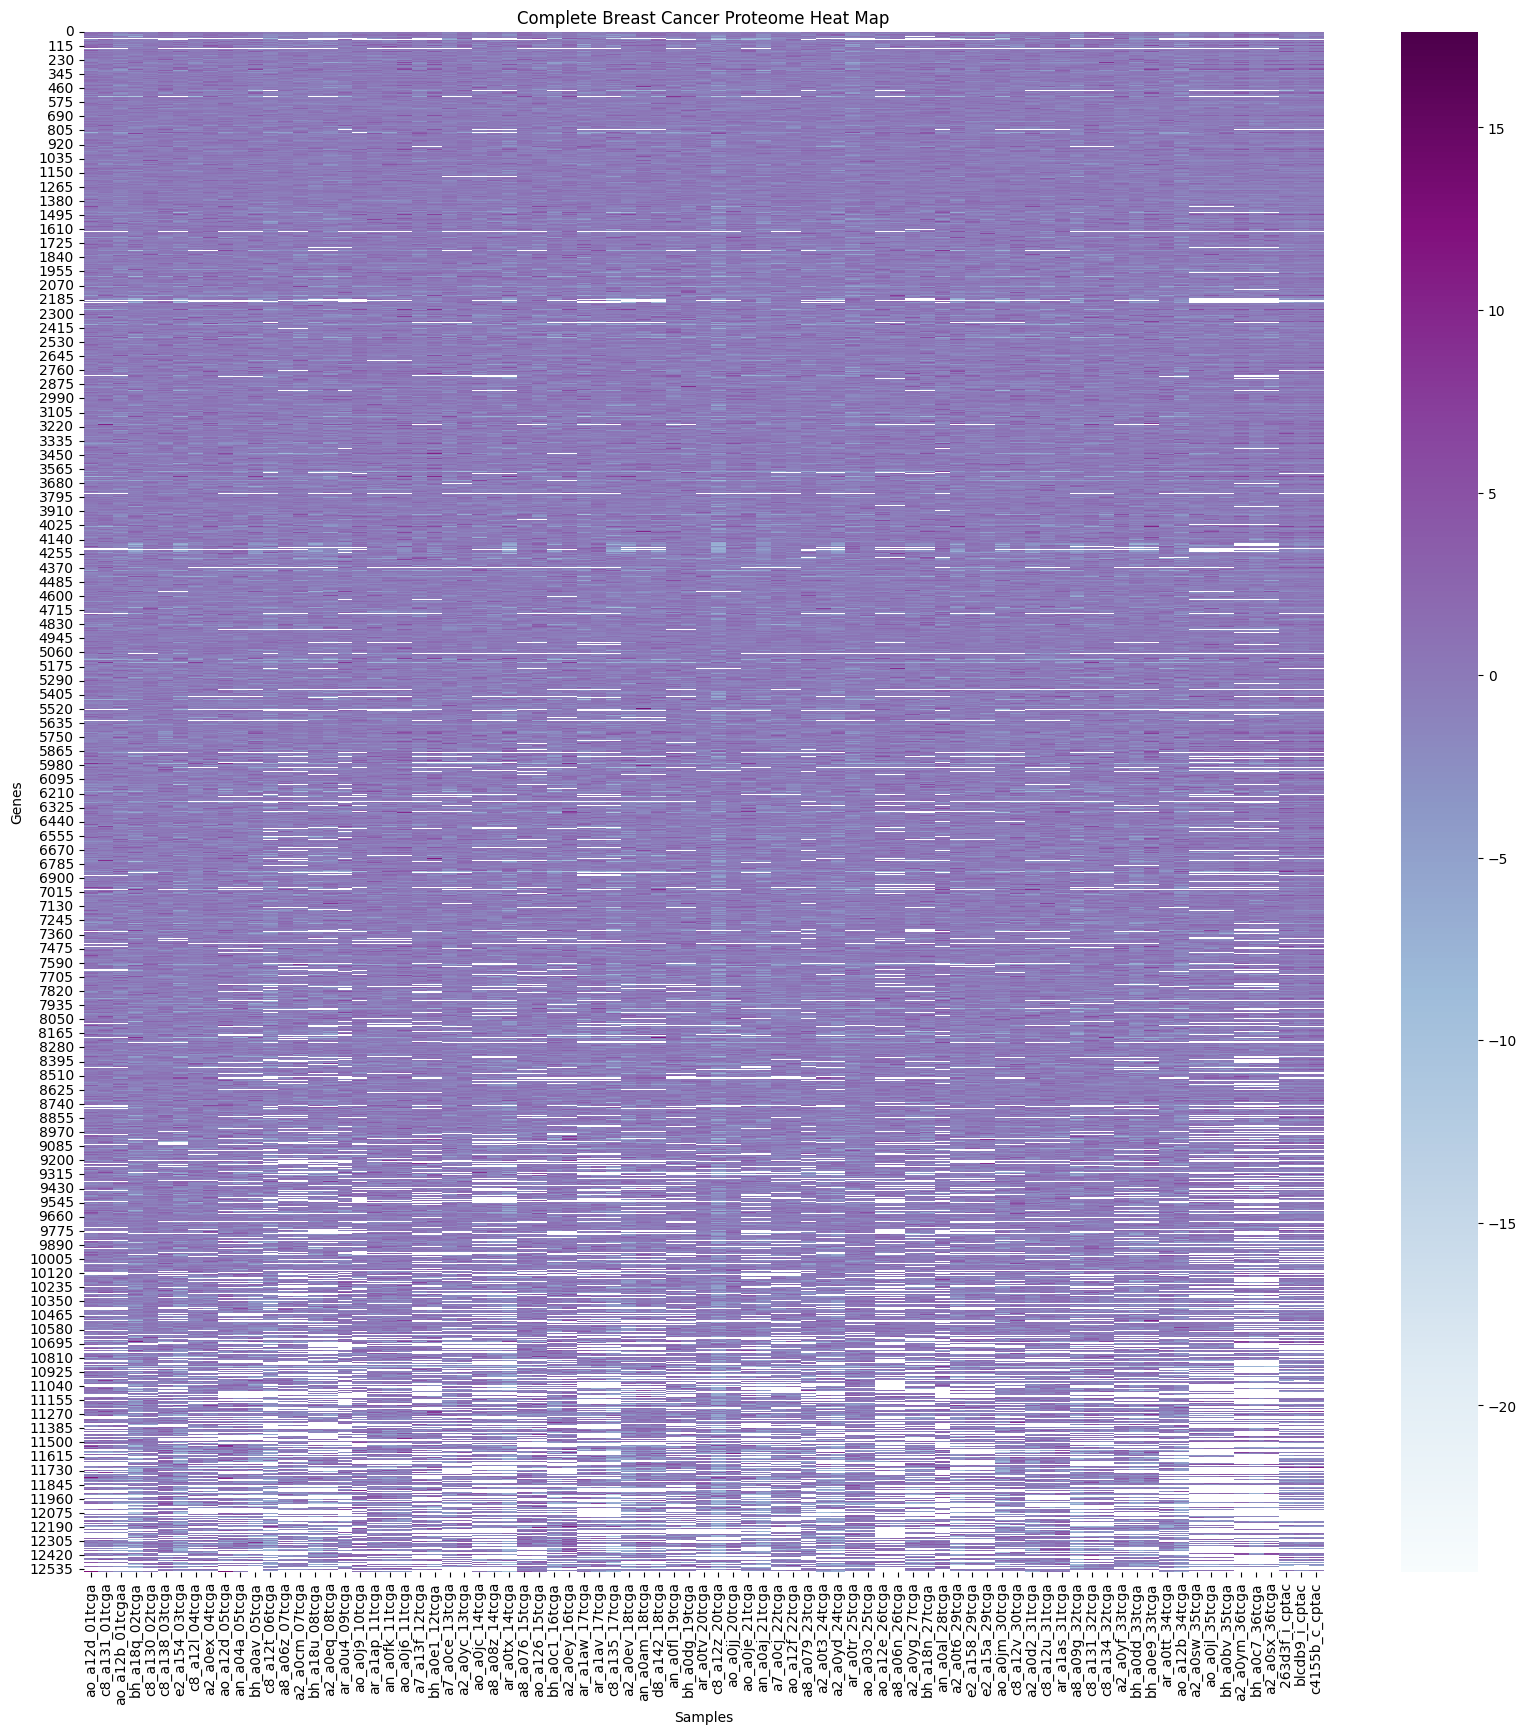

In [7]:
plt.figure(figsize=(20, 20))
comproteome = sns.heatmap(df_numeric, cmap='BuPu')
plt.title('Complete Breast Cancer Proteome Heat Map')
plt.xlabel('Samples')
plt.ylabel('Genes')
proteome1 = comproteome.get_figure()    
proteome1.savefig('complete_proteome.png', dpi=400)
plt.show()

__Graph 1.__ _Complete HeatMap._ The expression profiles of the 77 proteomic profiles are shown, where the expression of the 12,000 genes related to breast cancer is observed. The color code of the vertical bar on the right is followed.

# ELIMINATION OF NON-NUMERIC DATA AND THE SECOND HALF OF THE PROFILES.
This step is performed in order to generate a second HeatMap, which shows the first 39 proteomic profiles, for further visualization.

In [8]:
df_numeric_pt1 = df.drop(columns=['an_a0fl_19tcga', 'bh_a0dg_19tcga', 'ar_a0tv_20tcga', 'c8_a12z_20tcga', 'ao_a0jj_20tcga', 'ao_a0je_21tcga',
                                  'an_a0aj_21tcga', 'a7_a0cj_22tcga', 'ao_a12f_22tcga', 'a8_a079_23tcga', 'a2_a0t3_24tcga', 'a2_a0yd_24tcga',
                                  'ar_a0tr_25tcga', 'ao_a03o_25tcga', 'ao_a12e_26tcga', 'a8_a06n_26tcga', 'a2_a0yg_27tcga', 'bh_a18n_27tcga',
                                  'an_a0al_28tcga', 'a2_a0t6_29tcga', 'e2_a158_29tcga', 'e2_a15a_29tcga', 'ao_a0jm_30tcga', 'c8_a12v_30tcga',
                                  'a2_a0d2_31tcga', 'c8_a12u_31tcga', 'ar_a1as_31tcga', 'a8_a09g_32tcga', 'c8_a131_32tcga', 'c8_a134_32tcga',
                                  'a2_a0yf_33tcga', 'bh_a0dd_33tcga', 'bh_a0e9_33tcga', 'ar_a0tt_34tcga', 'ao_a12b_34tcga', 'a2_a0sw_35tcga',
                                  'ao_a0jl_35tcga', 'bh_a0bv_35tcga', 'a2_a0ym_36tcga', 'bh_a0c7_36tcga', 'a2_a0sx_36tcga', '263d3f_i_cptac',
                                  'blcdb9_i_cptac', 'c4155b_c_cptac', 'refseq_accession_number', 'gene_symbol', 'gene_name'])

# HEATMAP GENERATION (FIRST HALF)
As a second graph, a HeatMap is made with the first 39 proteomes identified.

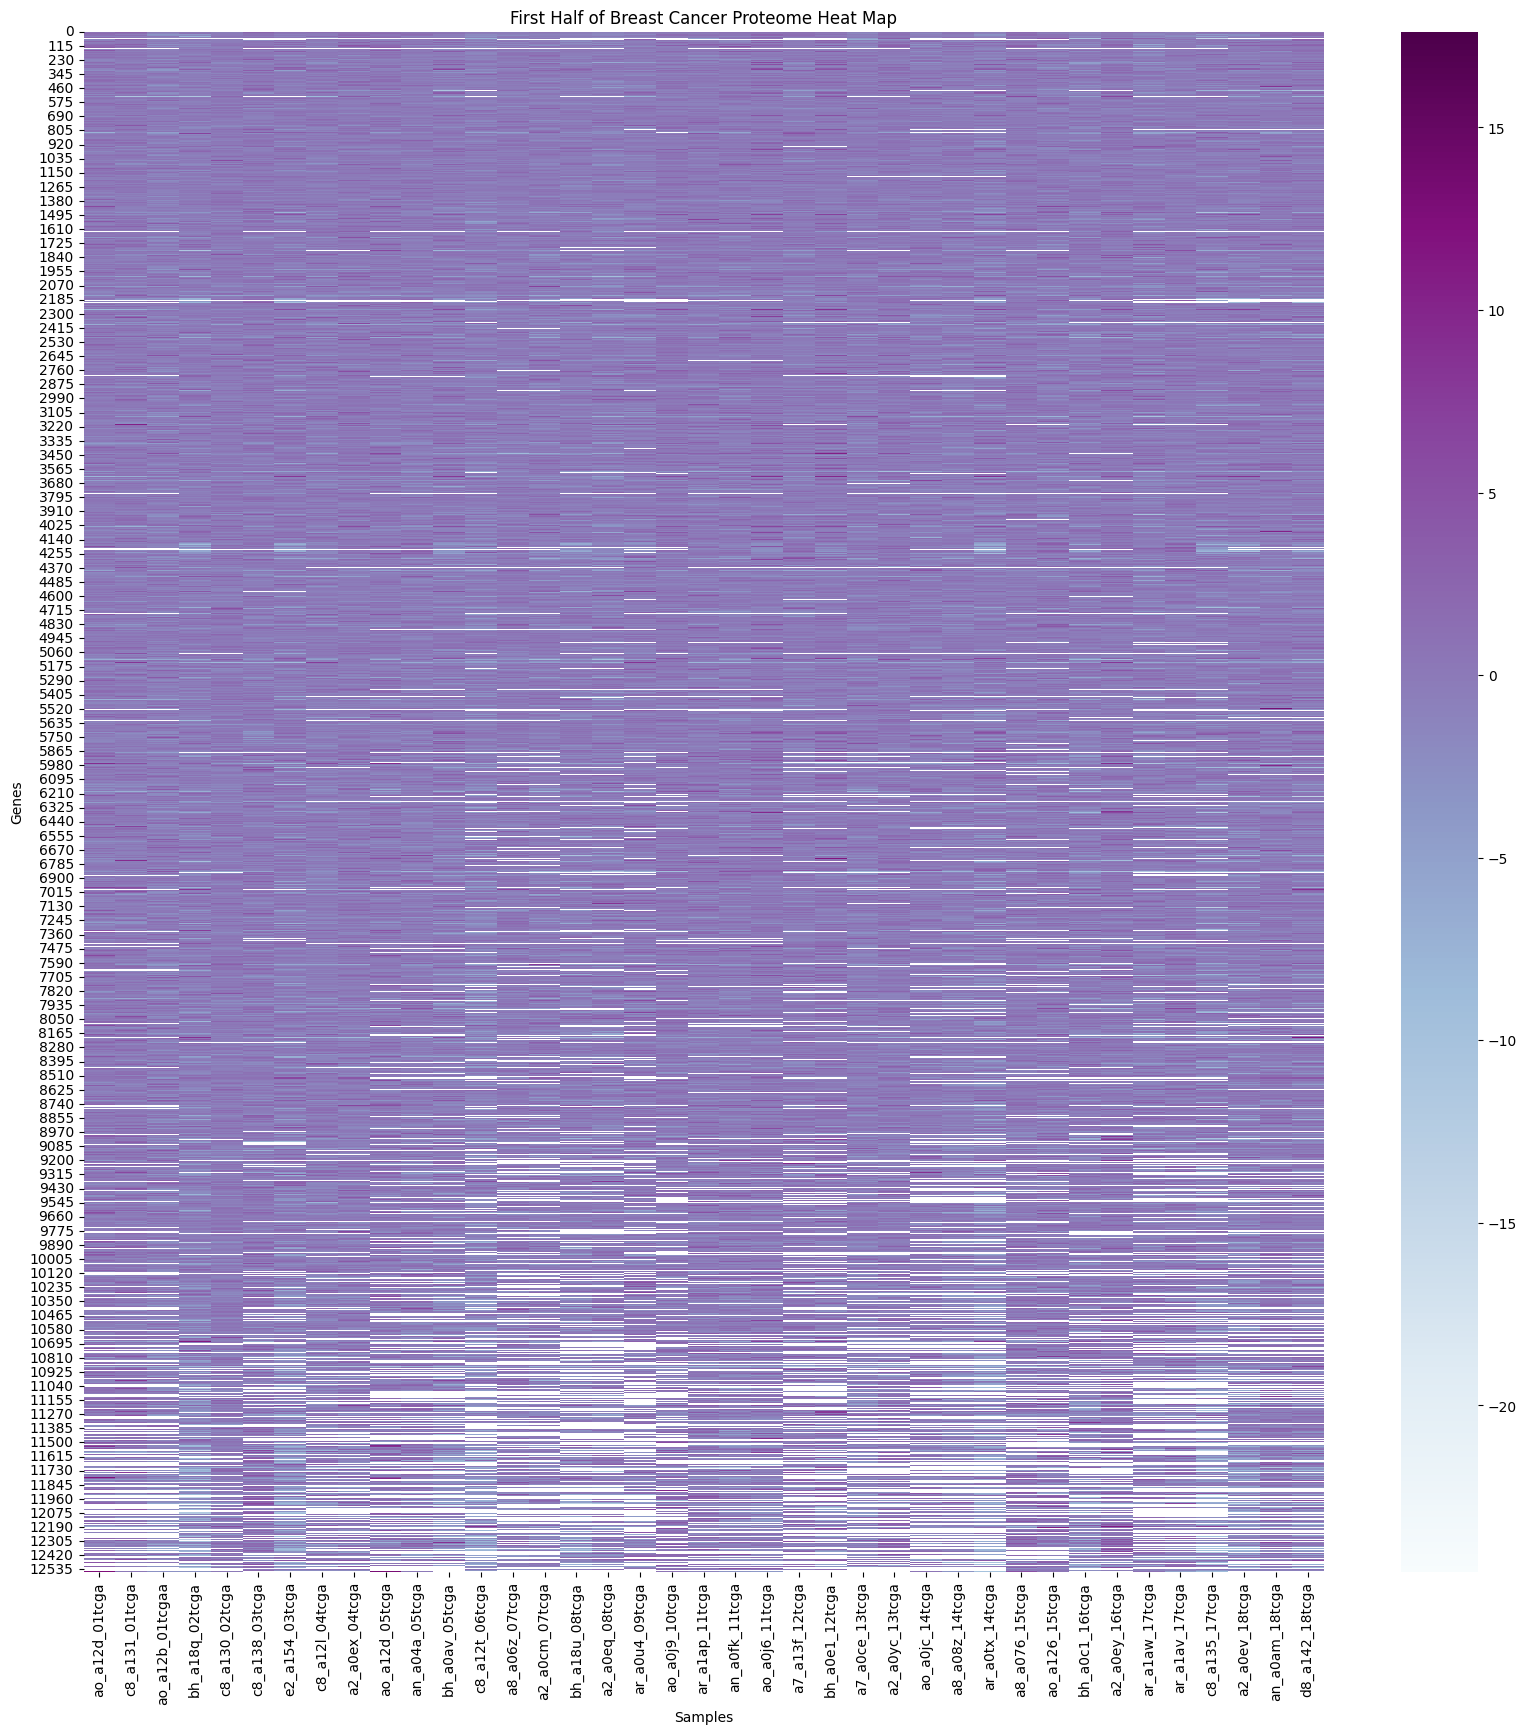

In [9]:
plt.figure(figsize=(20, 20))
fhproteome = sns.heatmap(df_numeric_pt1, cmap='BuPu')
plt.title('First Half of Breast Cancer Proteome Heat Map')
plt.xlabel('Samples')
plt.ylabel('Genes')
proteome2 = fhproteome.get_figure()    
proteome2.savefig('1sthalf_proteome.png', dpi=400)
plt.show()

__Gráfico 2.__ _HeatMap of the First Half of the DataSet._ The expression profiles of the first 39 proteomic profiles are observed, where the expression of the 12 thousand genes related to Breast Cancer is observed.

# ELIMINATION OF NON-NUMERIC DATA AND THE FIRST HALF OF THE PROFILES.
This step is performed in order to generate a third HeatMap, which shows the last 38 proteomic profiles, for better visualization.

In [10]:
df_numeric_pt2 = df.drop(columns=['ao_a12d_01tcga', 'c8_a131_01tcga', 'ao_a12b_01tcgaa', 'bh_a18q_02tcga', 'c8_a130_02tcga', 'c8_a138_03tcga',
                                  'e2_a154_03tcga', 'c8_a12l_04tcga', 'a2_a0ex_04tcga', 'ao_a12d_05tcga', 'an_a04a_05tcga', 'bh_a0av_05tcga',
                                  'c8_a12t_06tcga', 'a8_a06z_07tcga', 'a2_a0cm_07tcga', 'bh_a18u_08tcga', 'a2_a0eq_08tcga', 'ar_a0u4_09tcga',
                                  'ao_a0j9_10tcga', 'ar_a1ap_11tcga', 'an_a0fk_11tcga', 'ao_a0j6_11tcga', 'a7_a13f_12tcga', 'bh_a0e1_12tcga',
                                  'a7_a0ce_13tcga', 'a2_a0yc_13tcga', 'ao_a0jc_14tcga', 'a8_a08z_14tcga', 'ar_a0tx_14tcga', 'a8_a076_15tcga',
                                  'ao_a126_15tcga', 'bh_a0c1_16tcga', 'a2_a0ey_16tcga', 'ar_a1aw_17tcga', 'ar_a1av_17tcga', 'c8_a135_17tcga',
                                  'a2_a0ev_18tcga', 'an_a0am_18tcga', 'd8_a142_18tcga', 'refseq_accession_number', 'gene_symbol',
                                  'gene_name'])

# HEATMAP GENERATION (SECOND HALF)
As a third graph, a HeatMap is made with the last 38 proteomes identified.

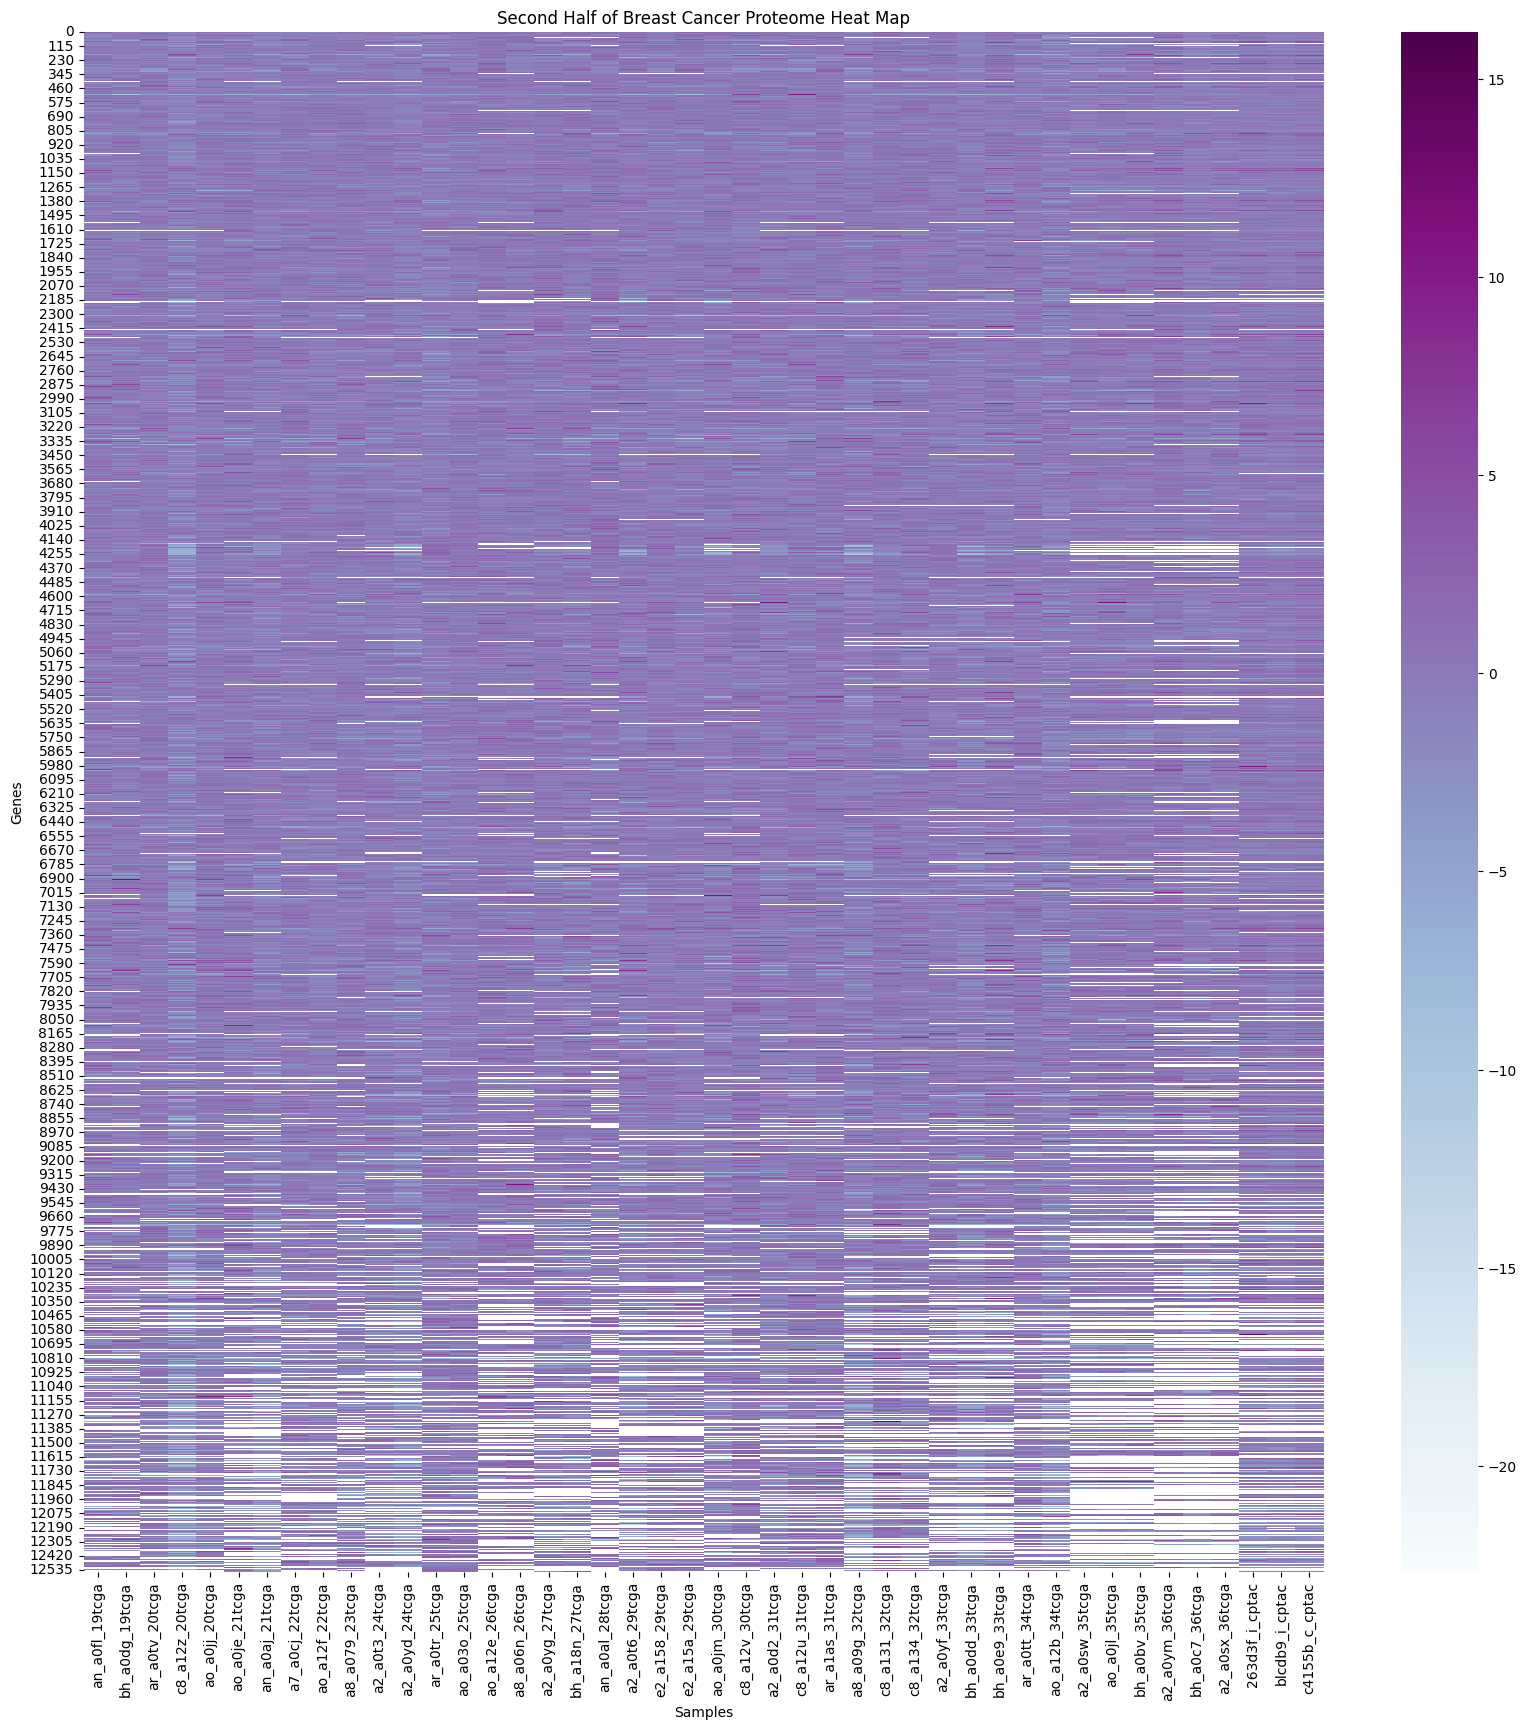

In [11]:
plt.figure(figsize=(20, 20))
shproteome = sns.heatmap(df_numeric_pt2, cmap='BuPu')
plt.title('Second Half of Breast Cancer Proteome Heat Map')
plt.xlabel('Samples')
plt.ylabel('Genes')
proteome3 = shproteome.get_figure()    
proteome3.savefig('2ndhalf_proteome.png', dpi=400)
plt.show()

__Gráfico 3.__ _HeatMap of the second half of the DataSet._ The expression profiles of the last 38 proteomic profiles are observed, where the expression of the 12 thousand genes related to Breast Cancer is observed.